
# Basics of OpenCV

**Saurav Mishra**

## Drawing on Images

## Objective
Learn to draw different geometric shapes with OpenCV
You will learn these functions : cv.line(), cv.circle() , cv.rectangle(), cv.ellipse(), cv.putText() etc.

## Code
Some common arguments used in code as below:

1. **img** : The image where you want to draw the shapes
2. **color** : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
3. **thickness** : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. default thickness = 1
4. **lineType** : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv.LINE_AA gives anti-aliased line which looks great for curves.

    
The lineType parameter controls the quality of rendering. When lineType is set to CV_AA, anti-aliased ( smooth ) lines 
are drawn. Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA gives 
anti-aliased line which looks great for curves.


We will use a blank image with white background to draw and experiment with the various different shapes.

In [1]:
# Import the require libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import math

## Drawing a Line

The function line draws the line segment between pt1 and pt2 points in the image. The line is clipped by the image boundaries.

    @param img Image.
    @param pt1 First point of the line segment.
    @param pt2 Second point of the line segment.
    @param color Line color.
    @param thickness Line thickness.
    @param lineType Type of the line. See #LineTypes.
    @param shift Number of fractional bits in the point coordinates.

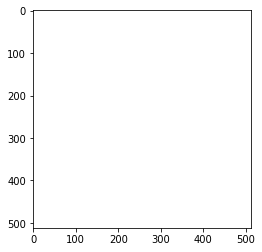

In [2]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)
plt.imshow(blank_img)

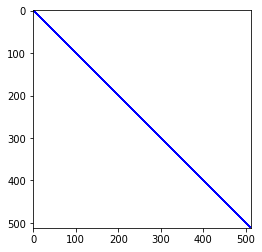

In [3]:
# Draw a diagonal blue line with thickness of 3 px

cv2.line(blank_img ,pt1=(0,0), pt2=(511,511), color=(0, 0, 255), thickness=3, )
plt.imshow(blank_img)

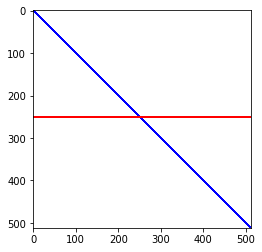

In [4]:
# Draw a straight red line running through the middle of the cutting the image horizonally into 2 halves.

cv2.line(blank_img ,pt1=(0,250), pt2=(512,250), color=(255, 0, 0), thickness=3)
plt.imshow(blank_img)

## Drawing a Rectangle

We would need top-left corner and bottom-right corner of rectangle.

The function rectangle draws a rectangle outline or a filled rectangle whose two opposite corners are pt1 and pt2.

    @param img Image.
    @param pt1 Vertex of the rectangle.
    @param pt2 Vertex of the rectangle opposite to pt1 .
    @param color Rectangle color or brightness (grayscale image).
    @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED, mean that the function
    has to draw a filled rectangle.
    @param lineType Type of the line. See #LineTypes
    

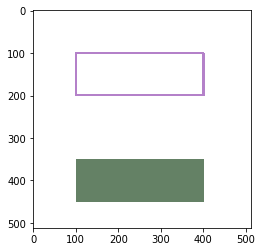

In [5]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

# pt1 is the top-left of the rectangle
# pt2 is the bottom right of the rectangle

cv2.rectangle(blank_img, pt1=(100,100), pt2=(400,200), color=(180,129,201), thickness=3) # hollow rect

cv2.rectangle(blank_img, pt1=(100,350), pt2=(400,450), color=(100,129,101), thickness=-1) # solid rect

plt.imshow(blank_img)

## Drawing a Circle

We would need the center coordinates and radius of the circle.

The function circle draws a simple or filled circle with a given center and radius.

    @param img Image where the circle is drawn.
    @param center Center of the circle.
    @param radius Radius of the circle.
    @param color Circle color.
    @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED, mean that a filled circle 
    is to be drawn.
    @param lineType Type of the circle boundary. See #LineTypes
    @param shift Number of fractional bits in the coordinates of the center and in the radius value.

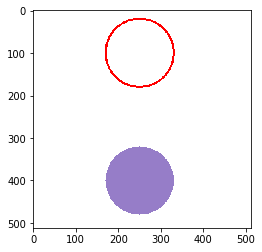

In [6]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

cv2.circle(img=blank_img, center=(250,100), radius=80, color=(255,0,0), thickness=3) # Hollow Circle

cv2.circle(img=blank_img, center=(250, 400), radius=80, color=(150,125,200), thickness=-1) # Filled Circle

plt.imshow(blank_img)

Circle can also be drawn using the ellipse function from OpenCV. The details of the ellipse function are discussed in the later section. A sample code showing how to draw a circle is implemented below -

**Circles are special case of ellipse where the major and the minor axes are equal.**

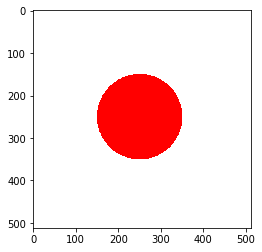

In [7]:
blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

cv2.ellipse(blank_img, center=(250,250), axes=(100,100), angle=0, startAngle=0, endAngle=360, color=(255,0,0), thickness=-1)

plt.imshow(blank_img)

## Drawing Polygons

The function polylines draws one or more polygonal curves.

    @param img Image.
    @param pts Array of polygonal curves.
    @param isClosed Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws 
    a line from the last vertex of each curve to its first vertex.
    @param color Polyline color.
    @param thickness Thickness of the polyline edges.
    @param lineType Type of the line segments. See #LineTypes
    @param shift Number of fractional bits in the vertex coordinates.


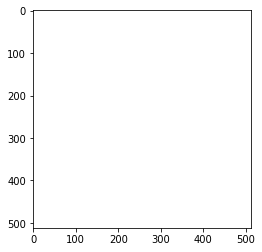

In [8]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

plt.imshow(blank_img)

In [9]:
# To draw a polygon we will first define the vertices.
# OpenCV function PolyLines expects a list of vertices to draw a polygon.

vertices = np.array([[100,300],[200,200],[400,300],[200,400]], np.int32)
print("Shape of Vertices: ", vertices.shape)
vertices

Shape of Vertices:  (4, 2)


array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]])

In [10]:
# Now as we get the shape of the vertices above as 2D, OpenCV is very specific when it comes to the shapes.
# OpenCV needs the vertices in a 3 dimension corresponding to the 3 color channels.
# So we need to reshape the vertices into 3D

poly_vertives = vertices.reshape((-1,1,2)) # This just adds an additional pair of vertices to support the color channels.
# An additional dimension - 1

# What the above line means is that, I need a matrix with unknown number of rows but a single column and each element with 2 sub-elements. 
# Now numpy internally calculates the size of unknown and automatically creates a matrix for you. 
# It is just a fancy way of doing pts.reshape((4,1,2))
# https://stackoverflow.com/questions/51723910/at-what-situation-points-need-to-be-reshaped-like-reshape-1-1-2-in-python-open/51724120

print("Shape of Vertices after conversion: ",poly_vertives.shape)
poly_vertives

Shape of Vertices after conversion:  (4, 1, 2)


array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]])

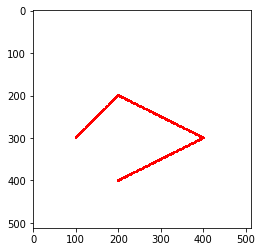

In [11]:
cv2.polylines(blank_img, [poly_vertives], isClosed=False, color=(255,0,0), thickness=5)

plt.imshow(blank_img)

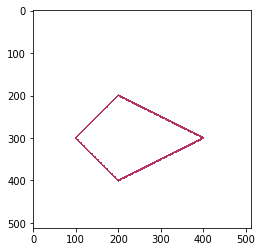

In [12]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

vertices = np.array([[100,300],[200,200],[400,300],[200,400]],np.int32)
pts = vertices.reshape((-1,1,2))

cv2.polylines(blank_img, [pts], isClosed=True, color=(180,50,100), thickness=3)

plt.imshow(blank_img)

**NOTE:** cv.polylines() can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling cv.line() for each line.

https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html

## Filled Polygons

Fills the area bounded by one or more polygons. The function **fillPoly** fills an area bounded by several polygonal contours. The function can fill complex areas, for example, areas with holes, contours with self-intersections (some of their parts), and so forth.
 
    @param img Image.
    @param pts Array of polygons where each polygon is represented as an array of points.
    @param color Polygon color.
    @param lineType Type of the polygon boundaries. See #LineTypes
    @param shift Number of fractional bits in the vertex coordinates.
    @param offset Optional offset of all points of the contours.

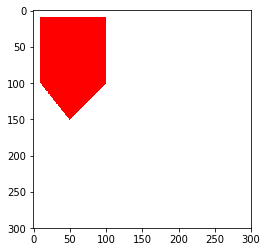

In [13]:
blank_img = 255* np.ones((300, 300, 3), np.uint8)

poly_points = np.array( [[[10,10],[100,10],[100,100],[50,150],[10,100]]], dtype=np.int32 )

cv2.fillPoly(blank_img, poly_points, color=(255, 0, 0), lineType=cv2.LINE_8 )

plt.imshow(blank_img)

## Adding Text to Images

To put texts in images, we need specify following things.

    Text data that you want to write
    Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
    Font type (Check cv.putText() docs for supported fonts)
    Font Scale (specifies the size of font)
    Regular things like color, thickness, lineType etc. For better look, lineType = cv.LINE_AA is recommended.

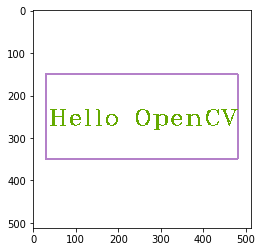

In [14]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

# pt1 is the top-left of the rectangle
# pt2 is the bottom right of the rectangle

cv2.rectangle(blank_img, pt1=(30,150), pt2=(480,350), color=(180,129,201), thickness=3) # hollow rect

font = cv2.FONT_HERSHEY_COMPLEX_SMALL
cv2.putText(blank_img, text='Hello OpenCV', org=(35,270), fontFace=font, fontScale= 2.8, color=(100,170,0), thickness=2, 
            lineType=cv2.LINE_AA)

plt.imshow(blank_img)

## Drawing an Ellipse

To draw the ellipse, we need to pass several arguments.

    The center location (x,y). 
    The axes lengths (major axis length, minor axis length) 
    Angle is the angle of rotation of ellipse in anti-clockwise direction. 
    startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from 
    major axis. i.e. giving values 0 and 360 gives the full ellipse. 
    For more details, check the documentation of cv.ellipse().
    
Understanding the Ellipse Axes and Angles: http://mathworld.wolfram.com/Ellipse.html
    
The function ellipse with more parameters draws an ellipse outline, a filled ellipse, an elliptic arc, or a filled ellipse sector. The drawing code uses general parametric form. A piecewise-linear curve is used to approximate the elliptic arc boundary. If you need more control of the ellipse rendering, you can retrieve the curve using **#ellipse2Poly** and then render it with #polylines or fill it with #fillPoly. If you use the first variant of the function and want to draw the whole ellipse, not an arc, pass `startAngle=0` and `endAngle=360`. If `startAngle` is greater than `endAngle`, they are swapped. 

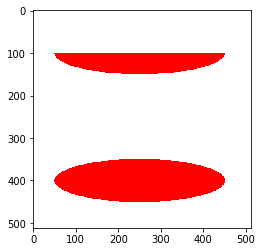

In [15]:
# Initialize a image with white background
blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

# half ellipse centered at (200,50)
cv2.ellipse(blank_img, center=(250,100), axes=(200,50), angle=0, startAngle=0, endAngle=180, color=(255,0,0), thickness=-1)

# full ellipse centered at (200,400)
cv2.ellipse(blank_img, center=(250,400), axes=(200,50), angle=0, startAngle=0, endAngle=360, color=(255,0,0), thickness=-1)

plt.imshow(blank_img)

Now lets see how the startAngle and endAngle function with varying angles in the forming of an ellipse

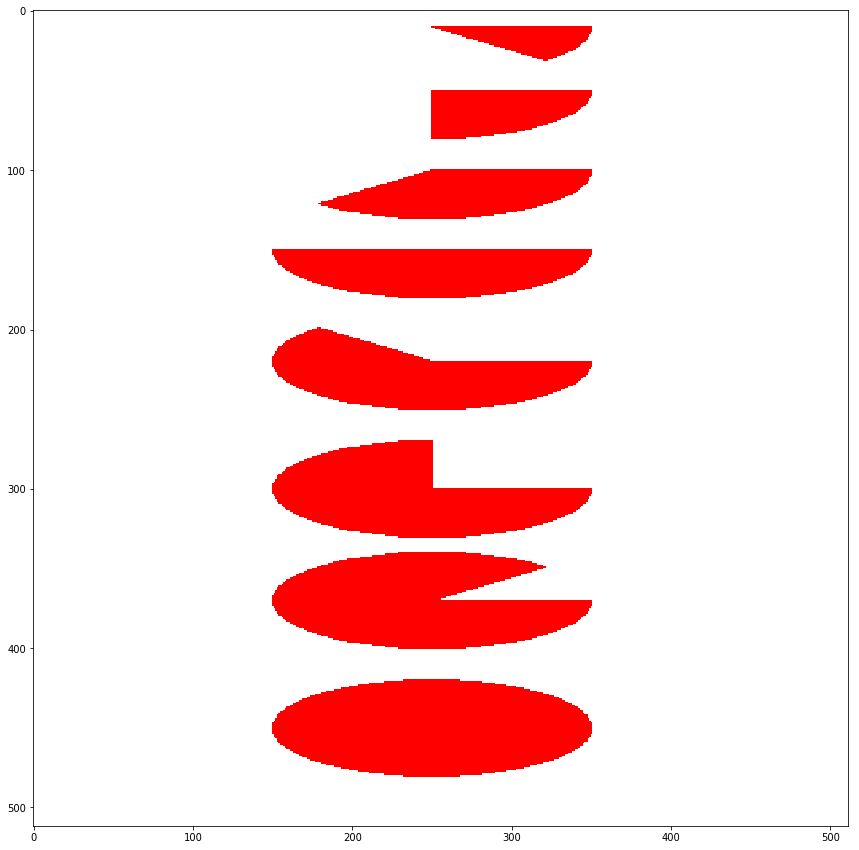

In [16]:
# Initialize a image with white background
blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

# Initialize a figure of sixe (15, 15)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

# startAngle=0, endAngle=45
cv2.ellipse(blank_img, center=(250,10), axes=(100,30), angle=0, startAngle=0, endAngle=45, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=90
cv2.ellipse(blank_img, center=(250,50), axes=(100,30), angle=0, startAngle=0, endAngle=90, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=135
cv2.ellipse(blank_img, center=(250,100), axes=(100,30), angle=0, startAngle=0, endAngle=135, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=180
cv2.ellipse(blank_img, center=(250,150), axes=(100,30), angle=0, startAngle=0, endAngle=180, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=225
cv2.ellipse(blank_img, center=(250,220), axes=(100,30), angle=0, startAngle=0, endAngle=225, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=270
cv2.ellipse(blank_img, center=(250,300), axes=(100,30), angle=0, startAngle=0, endAngle=270, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=315
cv2.ellipse(blank_img, center=(250,370), axes=(100,30), angle=0, startAngle=0, endAngle=315, color=(255,0,0), thickness=-1)

# startAngle=0, endAngle=360
cv2.ellipse(blank_img, center=(250,450), axes=(100,30), angle=0, startAngle=0, endAngle=360, color=(255,0,0), thickness=-1)

ax.imshow(blank_img)

## ellipse2Poly

Approximates an elliptic arc with a polyline. The function ellipse2Poly computes the vertices of a polyline that approximates the specified elliptic arc. It is used by ellipse().

Ref - https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#ellipse2poly

Python: cv2.ellipse2Poly(center, axes, angle, arcStart, arcEnd, delta) → pts

**Parameters:**

    center – Center of the arc.
    axes – Half of the size of the ellipse main axes. See the ellipse() for details.
    angle – Rotation angle of the ellipse in degrees. See the ellipse() for details.
    arcStart – Starting angle of the elliptic arc in degrees.
    arcEnd – Ending angle of the elliptic arc in degrees.
    delta – Angle between the subsequent polyline vertices. It defines the approximation accuracy.
    pts – Output vector of polyline vertices.


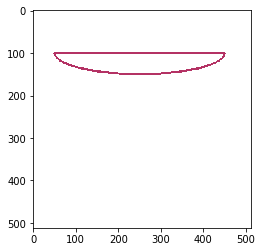

In [17]:
# Initialize a image with white background
blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

# half ellipse centered at (250,100)
poly_pts = cv2.ellipse2Poly(center=(250,100), axes=(200,50), angle=0, arcStart=0, arcEnd=180, delta=1)
# print("Points approximated by ellipse2Poly:", poly_pts)

cv2.polylines(blank_img, [poly_pts], isClosed=True, color=(180,50,100), thickness=3)

plt.imshow(blank_img)

# Some Common Coding Implementation

## 1. Triangle with centroid and the median lines

A centroid of a triangle is the point where the three medians of the triangle meet. 
A median of a triangle is a line segment from one vertex to the mid point on the opposite side of the triangle. 
    
The centroid is also called the center of gravity of the triangle. It can be found using the formula -

Centroid(X, Y) = (x1 + x2 + x3//3, y1 + y2 + y3//3)

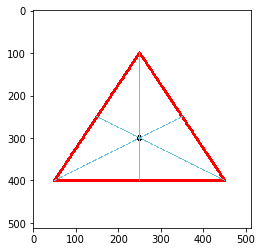

In [18]:
# Initialize a image with white background

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

vertices = np.array([[450, 400],[250,100],[50,400]], np.int32)
tri_vertices = vertices.reshape((-1,1,2))

cv2.polylines(blank_img, [tri_vertices], isClosed=True, color=(255,0,0), thickness=5)

# draw the centroid on the window
centroid = ((450+250+50)//3, (400+100+400)//3)    
cv2.circle(blank_img, centroid, 7, (0, 0, 0), thickness=-1)

# drawing the median lines
# mid-point of triangle base
baseline_midpoint = ((450-50)//2 + 50, 400)
cv2.line(blank_img, pt1=(250,100), pt2=baseline_midpoint, color=(100, 200, 220), thickness=2) 

# mid-point of edge 1
edge1_midpoint = ((450-250)//2 + 250, (400-100)//2 + 100)
cv2.line(blank_img, pt1=(50,400), pt2=edge1_midpoint, color=(100, 200, 220), thickness=2) 

# mid-point of edge 2
edge2_midpoint = ((250-50)//2 + 50, (400-100)//2 + 100)
cv2.line(blank_img, pt1=(450,400), pt2=edge2_midpoint, color=(100, 200, 220), thickness=2) 

plt.imshow(blank_img)

## 2. Concentric Circles

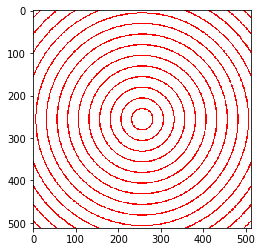

In [19]:
# draw concentric circles

blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

red = (255,0,0) # define the color

# calculate the center point of image to get the center of the circle
(centerX, centerY) = (blank_img.shape[1]//2, blank_img.shape[0]//2) # width, height 

for radius in range(0, 512, 25):
    cv2.circle(blank_img, (centerX, centerY), radius, red, thickness=2)
    
plt.imshow(blank_img)

## 3. Random Colored Circles

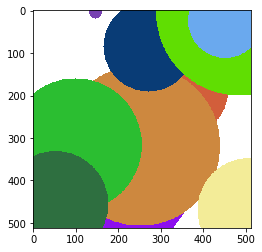

In [20]:
blank_img = 255 * np.ones(shape=(512,512,3), dtype=np.int16)

for i in range(0, 10):
    
    # Generating a new radius every time
    radius = np.random.randint(10, high = 200)
    
    # Generating a random color value every time
    color = np.random.randint(0, high = 256, size = (3,)).tolist()
    
    # Generating a new center each time
    (centerX, centerY) = np.random.randint(0, high = 512, size = (2,))
    
    cv2.circle(blank_img, (centerX, centerY), radius, color, -1)

plt.imshow(blank_img)

## 4. Drawing OpenCV Logo

1. Try to create the logo of OpenCV using drawing functions available in OpenCV.
    (https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html_

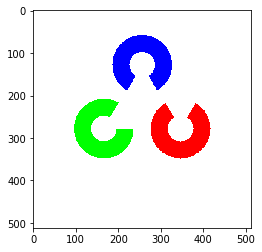

In [21]:
# Method 1

blank_img = 255* np.ones((512, 512, 3), np.uint8)

# Circle radius to draw around the vertices
outer_Radius = 70
inner_radius = 30

angle = 60 # assuming the inner cut triangle to be equilateral

distanceBetweenTheCircles = 180
heightOfTheTriangle = 150 #int(d//2*math.sqrt(3)) - This formula is derived by equating (base*height)/2 = (sqrt(3)*a^2)/4

red_circle = (256,128)
green_circle = (red_circle[0]-distanceBetweenTheCircles//2, red_circle[1]+heightOfTheTriangle)
blue_circle = (red_circle[0]+distanceBetweenTheCircles//2, red_circle[1]+heightOfTheTriangle)

# print("red",red_circle)
# print("green",green_circle)
# print("blue",blue_circle)

red = (0, 0, 255)
green = (0, 255, 0)
blue = (255, 0, 0)
black = (0, 0, 0)
white = (255, 255, 255)

thickness = -1

cv2.circle(blank_img, red_circle, outer_Radius, red, thickness)
cv2.circle(blank_img, green_circle, outer_Radius, green, thickness)
cv2.circle(blank_img, blue_circle, outer_Radius, blue, thickness)

cv2.circle(blank_img, red_circle, inner_radius, white, thickness)
cv2.circle(blank_img, green_circle, inner_radius, white, thickness)
cv2.circle(blank_img, blue_circle, inner_radius, white, thickness)

cv2.ellipse(blank_img, red_circle, (outer_Radius, outer_Radius), angle, 0, angle, white, thickness)
cv2.ellipse(blank_img, green_circle, (outer_Radius, outer_Radius), 360-angle, 0, angle, white, thickness)
cv2.ellipse(blank_img, blue_circle, (outer_Radius, outer_Radius), 360-2*angle, angle, 0, white, thickness)

plt.imshow(blank_img)

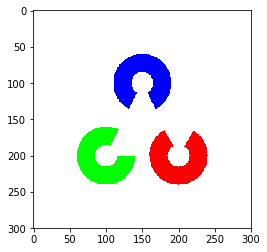

In [22]:
# Method 2 - Utilizing Contours , Circle and ellipse

blank_img = 255* np.ones((300, 300, 3), np.uint8)

tri_vertex1 = (150, 100)
tri_vertex2 = (100, 200)
tri_vertex3 = (200, 200)

triangle_cnt = np.array( [tri_vertex1, tri_vertex2, tri_vertex3] )

cv2.circle(blank_img, tri_vertex1, 40, (0,0,255), -1)
cv2.circle(blank_img, tri_vertex2, 40, (0, 255, 0), -1)
cv2.circle(blank_img, tri_vertex3, 40, (255,0,0), -1)

cv2.circle(blank_img, tri_vertex1, 15, (255,255,255), -1)
cv2.circle(blank_img, tri_vertex2, 15, (255,255,255), -1)
cv2.circle(blank_img, tri_vertex3, 15, (255,255,255), -1)

cv2.drawContours(blank_img, [triangle_cnt], 0, (255,255,255), -1)

cv2.ellipse(blank_img, tri_vertex3, (40, 40), 240, 0, 60, (255,255,255), -1)
cv2.ellipse(blank_img, tri_vertex3, (40, 40), 180, 0, 60, (255,0,0), -1)
cv2.circle(blank_img, tri_vertex3, 15, (255,255,255), -1)

plt.imshow(blank_img)

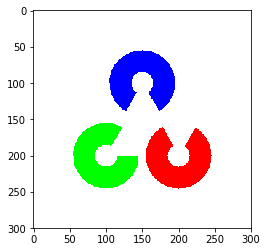

In [23]:
# Method 3 - Utilizing Polylines, Circles and Ellipses

blank_img = 255* np.ones((300, 300, 3), np.uint8)

tri_vertex1 = (150, 100)
tri_vertex2 = (100, 200)
tri_vertex3 = (200, 200)

tri_vertex = np.array( [tri_vertex1, tri_vertex2, tri_vertex3] )
cv2.polylines(blank_img, [tri_vertex], isClosed=True, color=(255,255,255), thickness=1)

cv2.circle(blank_img, tri_vertex1, 45, (0,0,255), -1)
cv2.circle(blank_img, tri_vertex2, 45, (0, 255, 0), -1)
cv2.circle(blank_img, tri_vertex3, 45, (255,0,0), -1)

cv2.circle(blank_img, tri_vertex1, 15, (255,255,255), -1)
cv2.circle(blank_img, tri_vertex2, 15, (255,255,255), -1)
cv2.circle(blank_img, tri_vertex3, 15, (255,255,255), -1)

cv2.ellipse(blank_img, tri_vertex1, (45, 45), 60, 0, 60, (255,255,255), -1)
cv2.ellipse(blank_img, tri_vertex1, (45, 45), 180, 0, 60, (0,0,255), -1)
cv2.circle(blank_img, tri_vertex1, 15, (255,255,255), -1)

cv2.ellipse(blank_img, tri_vertex2, (45, 45), 300, 0, 60, (255,255,255), -1)
cv2.ellipse(blank_img, tri_vertex2, (45, 45), 180, 0, 60, (0,255,0), -1)
cv2.circle(blank_img, tri_vertex2, 15, (255,255,255), -1)

cv2.ellipse(blank_img, tri_vertex3, (45, 45), 240, 0, 60, (255,255,255), -1)
cv2.ellipse(blank_img, tri_vertex3, (45, 45), 180, 0, 60, (255,0,0), -1)
cv2.circle(blank_img, tri_vertex3, 15, (255,255,255), -1)

plt.imshow(blank_img)